<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module3_Part4_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 - Part 4 Python: Data Verb - Aggregate()

The following python packages will be used for this notebook.

In [ ]:
import pandas as pd
import numpy as np

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

### Example 3.4.P
For this notebook, we will consider data from a pizza place. The following fields are provided in this data.  This data was collected over 2 years -- one dataset for each year.
 
The following 7 fields will be considered here:

*   LocatonID: Unique ID for each pizza store location
*   DeliveryType: Direct (Store completed the delivery) or SubContract (Delivery was subcontracted out)
*   SameZip: Was the delivery address in the same zipcode as the location?
*   Type: Descriptor for how order was obtained (In-Person, Phone / App, Corporate, OtherLocation)
*   Minutes: Minutes to process order and deliver pizza 
*   Comments:  When Minutes over 1 hour, comments are required.


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Analysis for 2019

In [ ]:
PD2019 = pd.read_csv("/content/sample_data/PizzaDelivery2019.csv") 

What is the size of the dataframe?

In [ ]:
PD2019.shape

(8785, 6)

### Aside: Google Sheet Style Output in Colab

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

The following extension can be used to preview data via a Google Sheet structure inside of Colab.

In [ ]:
%load_ext google.colab.data_table

The following command can be used to unload this extension from this session of Colab.

In [ ]:
%unload_ext google.colab.data_table

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

### Using the Google Sheet Style Extension

In [ ]:
PD2019

## Continue with Analysis for 2019

We will make extensive use of the <strong>dfply</strong> package in our analysis.

In [ ]:
pip install dfply

Next, import the dfply package into this session of Colab.

In [ ]:
from dfply import *

## Getting Basic Summaries

The <strong>summarize()</strong> function in dfply can be used to get basic summaries.  There are slight variations in the syntax.



*   Summaries like mean, median, std are obtained by evoking the method for the summary.  
*   A simple count can be accomplished using the n() function.

<strong>Note</strong>:  The round method can be used to round all the values within the dataframe.  This approach will round all non-itergers to 1 decimal place.



In [ ]:
Outcomes2019 = (
                 PD2019 
                 >> summarize(Avg = X.Minutes.mean(), Count = n(X.Minutes))
               )

Outcomes2019.round(1)

,Avg,Count
0,9.6,8785


The <strong>group_by()</strong> can be used to obtain the desired summaries across the levels of another categorical variable.  Here the summaries are being obtained across the two delivery types, e.g. Direct (Store location provides delivery) and SubContract (a delivery service was used for delivery).

In [ ]:
Outcomes2019 = (
        PD2019 
        >> group_by(X.DeliveryType)
        >> summarize(Avg = X.Minutes.mean(), Count = n(X.Minutes))
        )

Outcomes2019.round(1)

,DeliveryType,Avg,Count
0,Direct,9.8,8028
1,SubContract,8.1,757


Realize that more than one variable can be specifed by the group_by() function.

In [ ]:
Outcomes2019 = (
        PD2019 
        >> group_by(X.DeliveryType, X.SameZip )
        >> summarize(Avg = X.Minutes.mean(), Count = n(X.Minutes))
        )

Outcomes2019.round(1)

,SameZip,DeliveryType,Avg,Count
0,No,Direct,9.4,3218
1,Yes,Direct,10.0,4810
2,No,SubContract,9.5,429
3,Yes,SubContract,6.3,328


An extension to three categorical variables. 

In [ ]:
Outcomes2019 = (
        PD2019 
        >> group_by(X.DeliveryType, X.SameZip, X.Type)
        >> summarize(Avg = X.Minutes.mean())
        )

Outcomes2019.round(1)

,Type,SameZip,DeliveryType,Avg
0,Corporate,No,Direct,11.6
1,In-Person,No,Direct,5.4
2,OtherLocation,No,Direct,17.6
3,Phone / App,No,Direct,9.3
4,Corporate,Yes,Direct,13.0
5,In-Person,Yes,Direct,5.9
6,OtherLocation,Yes,Direct,16.4
7,Phone / App,Yes,Direct,9.5
8,Corporate,No,SubContract,11.9
9,In-Person,No,SubContract,5.3


###  Breaking apart a Column

The <strong>spread()</strong> function can be used to break apart a column.  Spread will create sepearate fields for each distinct value in a column.  There exists an <i>opposite</i> function called <strong>gather()</strong> that will bring a set of values in different columns into one column.

In this context, <strong>spread()</strong> is necessary because mutate() will be used to determine the difference in delivery times between Direct and SubContract.

In [ ]:
Outcomes2019 = (
        PD2019 
        >> group_by(X.DeliveryType, X.SameZip, X.Type)
        >> summarize(Avg = X.Minutes.mean())
        >> spread(X.DeliveryType, X.Avg)
        )

Outcomes2019.round(1)

,Type,SameZip,Direct,SubContract
0,Corporate,No,11.6,11.9
1,Corporate,Yes,13.0,6.8
2,In-Person,No,5.4,5.3
3,In-Person,Yes,5.9,4.1
4,OtherLocation,No,17.6,16.5
5,OtherLocation,Yes,16.4,11.9
6,Phone / App,No,9.3,10.1
7,Phone / App,Yes,9.5,6.6


Using mutate() to determine the difference in delivery times between the two modes of delivery.

In [ ]:
Outcomes2019 = (
        PD2019 
        >> group_by(X.DeliveryType, X.SameZip, X.Type)
        >> summarize(Avg = X.Minutes.mean())
        >> spread(X.DeliveryType, X.Avg)
        >> mutate(Difference = X.Direct - X.SubContract)
        )

Outcomes2019.round(1)

,Type,SameZip,Direct,SubContract,Difference
0,Corporate,No,11.6,11.9,-0.3
1,Corporate,Yes,13.0,6.8,6.2
2,In-Person,No,5.4,5.3,0.1
3,In-Person,Yes,5.9,4.1,1.8
4,OtherLocation,No,17.6,16.5,1.1
5,OtherLocation,Yes,16.4,11.9,4.6
6,Phone / App,No,9.3,10.1,-0.8
7,Phone / App,Yes,9.5,6.6,2.9


### Making the summary table easier to read

In [ ]:
Outcomes2019 = (
        PD2019 
        >> group_by(X.DeliveryType, X.SameZip, X.Type)
        >> summarize(Avg = X.Minutes.mean())
        >> spread(X.DeliveryType, X.Avg)
        >> mutate(Difference = X.Direct - X.SubContract)
        >> arrange(X.Difference)
        )

Outcomes2019 = Outcomes2019.round(1)

#Pretty Table...
print(Outcomes2019.to_string(index=False))


          Type SameZip  Direct  SubContract  Difference
   Phone / App      No     9.3         10.1        -0.8
     Corporate      No    11.6         11.9        -0.3
     In-Person      No     5.4          5.3         0.1
 OtherLocation      No    17.6         16.5         1.1
     In-Person     Yes     5.9          4.1         1.8
   Phone / App     Yes     9.5          6.6         2.9
 OtherLocation     Yes    16.4         11.9         4.6
     Corporate     Yes    13.0          6.8         6.2


The following snipit of code will allow this table to be saved into a CSV file.

In [ ]:
Outcomes2019.to_csv("/content/sample_data/Outcomes2019.csv", index=False) 

## Getting List of Comments

Suppose that in addition to the summary table above, the client has asked for a list of all comments.  Recall, comments are required when the time is longer than 1 hour.

In [ ]:
 Comments = (
              PD2019 
               >> filter_by(X.Minutes >= 60)
            )


Comments.to_csv("/content/sample_data/Comments2019.csv", index=False)  
Comments


,LocationID,DeliveryType,SameZip,Type,Minutes,Comments
88,LocationID_CGOEAQMTTGHA,SubContract,No,OtherLocation,60,Changed Order; Wrong Address;
1666,LocationID_IZTRQOTEXUHJ,Direct,No,In-Person,68,Customer Delayed;
1667,LocationID_IZTRQOTEXUHJ,Direct,No,In-Person,68,Customer Delayed;
1784,LocationID_IZTRQOTEXUHJ,Direct,No,OtherLocation,64,Changed Order;
2268,LocationID_FQBUKRCCQMNX,Direct,No,In-Person,90,Customer Delayed; Changed Order;
2669,LocationID_OSMKWADRZHQT,Direct,No,Phone / App,64,Changed Order;
3302,LocationID_VLXBQUJZXOMS,Direct,Yes,In-Person,73,Customer Delayed; Changed Order;
5486,LocationID_VQJUJJRMDPXM,Direct,Yes,OtherLocation,78,Changed Order;
6820,LocationID_PTUCRKNBWSDF,Direct,Yes,Phone / App,90,Chained Delivery; Number = 3; Changed Order;
6823,LocationID_PTUCRKNBWSDF,Direct,Yes,In-Person,90,Customer Delayed; Changed Order;


<font size="+2"><strong>Issue</strong></font>

A couple locations have <i>chained</i> a few of their deliveries.  This means that a sequence of deliveries were made at once.  Locations are not supposed to do this as this is against company policy.   The Number in the Comment field indicates how many deliveries were made in this sequence of deliveries.

### Aside: Simple Plotting via Seaborn

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

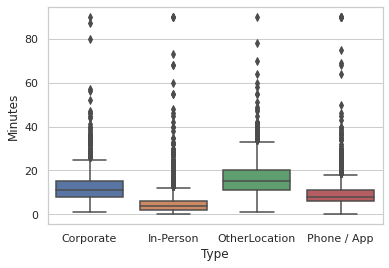

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

bxplot = sns.boxplot(x='Type',y='Minutes', data=PD2019)

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

### Getting Number from Comments for Chained Deliveries

A description of the approach taken here is provided below.

1.   Split the string on the "= " 
2.   Split the string a second time on the ";"
3.   Pull off remaining value



<p align='center'><font size='+3'>Chained Delivery; Number = 4; Changed Order;</font></p>

In [ ]:
#Understanding the string splitting process....
PD2019_Updated = PD2019
PD2019_Updated.Comments.str.split("= ").str[1].str.split(";").str[0].dropna()

#PD2019_Updated.Comments.str.split("= ").str[1].str.split(";").str[0].replace(np.nan,'1')


6820    3
6825    6
6827    6
6831    4
6854    4
7745    3
7746    3
7747    5
7748    2
7751    4
7752    5
7754    4
7755    4
Name: Comments, dtype: object

Next, use the code snip-it above to pull out Number from Comments string.  A new field called Quantity will be created here.

In [ ]:
PD2019_Updated = (
                  PD2019_Updated 
                  >> mutate(Quantity = (X.Comments
                                         .str.split("= ")
                                         .str[1]
                                         .str.split(";")
                                         .str[0]
                                         .replace(np.nan,'1'))
                                        )
                 )

#Change datatype of Quanity to integer
PD2019_Updated['Quantity'] = PD2019_Updated['Quantity'].astype(int)
PD2019_Updated

,LocationID,DeliveryType,SameZip,Type,Minutes,Comments,Quantity
0,LocationID_KSUXLYQTGXZH,Direct,No,Corporate,7,NaN,1
1,LocationID_KSUXLYQTGXZH,Direct,No,In-Person,2,NaN,1
2,LocationID_KSUXLYQTGXZH,Direct,No,OtherLocation,13,NaN,1
3,LocationID_KSUXLYQTGXZH,Direct,No,In-Person,7,NaN,1
4,LocationID_KSUXLYQTGXZH,Direct,No,Phone / App,6,NaN,1
...,...,...,...,...,...,...,...
8780,LocationID_GTITADRGXKPG,Direct,Yes,Phone / App,10,NaN,1
8781,LocationID_GTITADRGXKPG,Direct,Yes,Corporate,9,NaN,1
8782,LocationID_GTITADRGXKPG,Direct,Yes,OtherLocation,12,NaN,1
8783,LocationID_GTITADRGXKPG,Direct,Yes,Phone / App,8,NaN,1


Getting updated summaries for deliveries that occured in 2019.  Notice that <strong>sum()</strong> function is used for Minutes and Quantity.  These two sums are used to create the average using mutate().

In [ ]:
Outcomes2019_Updated = (
        PD2019_Updated 
        >> group_by(X.DeliveryType, X.SameZip, X.Type)
        >> summarize(Total = X.Minutes.sum(), Deliveries = X.Quantity.sum() )
        >> mutate(Avg = X.Total/X.Deliveries)
         >> select(X.Type, X.SameZip, X.DeliveryType, X.Avg)
        >> spread(X.DeliveryType, X.Avg)
        >> mutate(Difference = X.Direct - X.SubContract)
        >> arrange(X.Difference)
        )

Outcomes2019_Updated = Outcomes2019_Updated.round(1)

#Pretty Table...
print(Outcomes2019_Updated.to_string(index=False))

          Type SameZip  Direct  SubContract  Difference
   Phone / App      No     9.3         10.1        -0.8
     Corporate      No    11.6         11.9        -0.3
     In-Person      No     5.4          5.3         0.1
 OtherLocation      No    17.6         16.5         1.1
     In-Person     Yes     5.9          4.1         1.8
   Phone / App     Yes     9.4          6.6         2.8
 OtherLocation     Yes    16.1         11.9         4.2
     Corporate     Yes    12.9          6.8         6.1




---

---





## Analysis for 2020

In [ ]:
PD2020 = pd.read_csv("/content/sample_data/PizzaDelivery2020.csv") 

In [ ]:
PD2020

,LocationID,DeliveryType,SameZip,Type,Quantity,Minutes,Comments
0,LocationID_3501,Direct,No,Phone / App,1,15,NaN
1,LocationID_3501,Direct,Yes,OtherLocation,1,31,NaN
2,LocationID_3501,Direct,Yes,Phone / App,1,15,NaN
3,LocationID_3501,Direct,Yes,Phone / App,1,21,NaN
4,LocationID_3501,Direct,Yes,Phone / App,1,35,NaN
...,...,...,...,...,...,...,...
4359,LocationID_4422,Direct,No,Phone / App,1,14,NaN
4360,LocationID_4422,Direct,No,OtherLocation,1,16,NaN
4361,LocationID_4422,Direct,No,Corporate,1,15,NaN
4362,LocationID_4422,Direct,No,Corporate,1,22,NaN


The following code chunk is used to fix issues with DeliveryType in the 2020 data.

In [ ]:
# PD2020 =  (
#           PD2020
#           >> mutate(DeliveryTypeFixed = case_when(
#                                               [X.DeliveryType == 'Subcontract', "SubContract"],
#                                               [True,'Direct']
#                                               )
#                     )
          
#           )
# PD2020

Getting the summaries for 2020 deliveries is easier becauase the Quantity column was automatically obtained when the data was obtained when data was obtained.

In [ ]:
Outcomes2020 = (
                  PD2020 
                  >> group_by(X.DeliveryType, X.SameZip, X.Type)
                  >> summarize(Total = X.Minutes.sum(),  Deliveries=X.Quantity.sum())
                  >> mutate(Avg = X.Total / X.Deliveries)
                  >> select(X.Type, X.SameZip, X.DeliveryType, X.Avg)
                  >> spread(X.DeliveryType, X.Avg)
                  >> mutate(Difference = X.Direct - X.Subcontract)
                  >> arrange(X.Difference)
              )
#Pretty Table...
Outcomes2020 = Outcomes2020.round(1)
print(Outcomes2020.to_string(index=False))

          Type SameZip  Direct  Subcontract  Difference
     Corporate     Yes    18.3         33.6       -15.3
     In-Person     Yes     9.4         12.9        -3.5
 OtherLocation     Yes    24.5         26.5        -2.0
   Phone / App     Yes    16.8         15.6         1.2
   Phone / App      No    15.1         11.0         4.1
     In-Person      No     8.0          3.0         5.0
     Corporate      No    17.1          7.0        10.1
 OtherLocation      No    25.0          NaN         NaN


## Putting the Two Years Together

Recall, the outcomes for 2019.

In [ ]:
Outcomes2019_Updated = (
                        PD2019_Updated 
                        >> group_by(X.DeliveryType, X.SameZip, X.Type)
                        >> summarize(Total = X.Minutes.sum(), Deliveries = X.Quantity.sum() )
                        >> mutate(Avg = X.Total/X.Deliveries)
                        >> select(X.Type, X.SameZip, X.DeliveryType, X.Avg)
                       )
Outcomes2019_Updated = Outcomes2019_Updated.round(1)
print(Outcomes2019_Updated.to_string(index=False))


          Type SameZip DeliveryType   Avg
     Corporate      No       Direct  11.6
     In-Person      No       Direct   5.4
 OtherLocation      No       Direct  17.6
   Phone / App      No       Direct   9.3
     Corporate     Yes       Direct  12.9
     In-Person     Yes       Direct   5.9
 OtherLocation     Yes       Direct  16.1
   Phone / App     Yes       Direct   9.4
     Corporate      No  SubContract  11.9
     In-Person      No  SubContract   5.3
 OtherLocation      No  SubContract  16.5
   Phone / App      No  SubContract  10.1
     Corporate     Yes  SubContract   6.8
     In-Person     Yes  SubContract   4.1
 OtherLocation     Yes  SubContract  11.9
   Phone / App     Yes  SubContract   6.6


And, the outcomes from 2020.

In [ ]:
Outcomes2020 = (
                  PD2020 
                  >> group_by(X.DeliveryType, X.SameZip, X.Type)
                  >> summarize(Total = X.Minutes.sum(),  Deliveries=X.Quantity.sum())
                  >> mutate(Avg = X.Total / X.Deliveries)
                  >> select(X.Type, X.SameZip, X.DeliveryType, X.Avg)
               )
#Pretty Table...
Outcomes2020 = Outcomes2020.round(1)
print(Outcomes2020.to_string(index=False))

          Type SameZip DeliveryType   Avg
     Corporate      No       Direct  17.1
     In-Person      No       Direct   8.0
 OtherLocation      No       Direct  25.0
   Phone / App      No       Direct  15.1
     Corporate     Yes       Direct  18.3
     In-Person     Yes       Direct   9.4
 OtherLocation     Yes       Direct  24.5
   Phone / App     Yes       Direct  16.8
     Corporate      No  Subcontract   7.0
     In-Person      No  Subcontract   3.0
   Phone / App      No  Subcontract  11.0
     Corporate     Yes  Subcontract  33.6
     In-Person     Yes  Subcontract  12.9
 OtherLocation     Yes  Subcontract  26.5
   Phone / App     Yes  Subcontract  15.6


Using <strong>bind_rows()</strong> to stack the two data frames.

In [ ]:
Outcomes = (
             Outcomes2019_Updated
              >> bind_rows(Outcomes2020)
           )

Outcomes = Outcomes.round(1)
print(Outcomes.to_string(index=False))

          Type SameZip DeliveryType   Avg
     Corporate      No       Direct  11.6
     In-Person      No       Direct   5.4
 OtherLocation      No       Direct  17.6
   Phone / App      No       Direct   9.3
     Corporate     Yes       Direct  12.9
     In-Person     Yes       Direct   5.9
 OtherLocation     Yes       Direct  16.1
   Phone / App     Yes       Direct   9.4
     Corporate      No  SubContract  11.9
     In-Person      No  SubContract   5.3
 OtherLocation      No  SubContract  16.5
   Phone / App      No  SubContract  10.1
     Corporate     Yes  SubContract   6.8
     In-Person     Yes  SubContract   4.1
 OtherLocation     Yes  SubContract  11.9
   Phone / App     Yes  SubContract   6.6
     Corporate      No       Direct  17.1
     In-Person      No       Direct   8.0
 OtherLocation      No       Direct  25.0
   Phone / App      No       Direct  15.1
     Corporate     Yes       Direct  18.3
     In-Person     Yes       Direct   9.4
 OtherLocation     Yes       Direc

In the combined dataframe, the year is not know.  Thus, fix this issue for both dataframes.

In [ ]:
Outcomes2019_Updated = (
                        Outcomes2019_Updated
                        >> mutate(Year = '2019')
                        )
Outcomes2019_Updated
#Outcomes2019_Updated.insert(0,'Year',Outcomes2019_Updated.pop('Year'))
#Outcomes2019_Updated


,Year,Type,SameZip,DeliveryType,Avg
0,2019,Corporate,No,Direct,11.6
1,2019,In-Person,No,Direct,5.4
2,2019,OtherLocation,No,Direct,17.6
3,2019,Phone / App,No,Direct,9.3
4,2019,Corporate,Yes,Direct,12.9
5,2019,In-Person,Yes,Direct,5.9
6,2019,OtherLocation,Yes,Direct,16.1
7,2019,Phone / App,Yes,Direct,9.4
8,2019,Corporate,No,SubContract,11.9
9,2019,In-Person,No,SubContract,5.3


Same for 2020...

In [ ]:
Outcomes2020 = (
                        Outcomes2020
                        >> mutate(Year = '2020')
                        )
Outcomes2020
Outcomes2020.insert(0,'Year',Outcomes2020.pop('Year'))
Outcomes2020

,Year,Type,SameZip,DeliveryType,Avg
0,2020,Corporate,No,Direct,17.1
1,2020,In-Person,No,Direct,8.0
2,2020,OtherLocation,No,Direct,25.0
3,2020,Phone / App,No,Direct,15.1
4,2020,Corporate,Yes,Direct,18.3
5,2020,In-Person,Yes,Direct,9.4
6,2020,OtherLocation,Yes,Direct,24.5
7,2020,Phone / App,Yes,Direct,16.8
8,2020,Corporate,No,Subcontract,7.0
9,2020,In-Person,No,Subcontract,3.0


Now, redo stacking of two dataframes.

In [ ]:
Outcomes = (
             Outcomes2019_Updated
              >> bind_rows(Outcomes2020)
           )

Outcomes = Outcomes.round(1)
print(Outcomes.to_string(index=False))

 Year           Type SameZip DeliveryType   Avg
 2019      Corporate      No       Direct  11.6
 2019      In-Person      No       Direct   5.4
 2019  OtherLocation      No       Direct  17.6
 2019    Phone / App      No       Direct   9.3
 2019      Corporate     Yes       Direct  12.9
 2019      In-Person     Yes       Direct   5.9
 2019  OtherLocation     Yes       Direct  16.1
 2019    Phone / App     Yes       Direct   9.4
 2019      Corporate      No  SubContract  11.9
 2019      In-Person      No  SubContract   5.3
 2019  OtherLocation      No  SubContract  16.5
 2019    Phone / App      No  SubContract  10.1
 2019      Corporate     Yes  SubContract   6.8
 2019      In-Person     Yes  SubContract   4.1
 2019  OtherLocation     Yes  SubContract  11.9
 2019    Phone / App     Yes  SubContract   6.6
 2020      Corporate      No       Direct  17.1
 2020      In-Person      No       Direct   8.0
 2020  OtherLocation      No       Direct  25.0
 2020    Phone / App      No       Direc

Using spread again...

In [ ]:
Outcomes = (
             Outcomes2019_Updated
              >> bind_rows(Outcomes2020)
              >> spread(X.DeliveryType,X.Avg)
           )

Outcomes = Outcomes.round(1)
print(Outcomes.to_string(index=False))

 Year           Type SameZip  Direct  SubContract  Subcontract
 2019      Corporate      No    11.6         11.9          NaN
 2019      Corporate     Yes    12.9          6.8          NaN
 2019      In-Person      No     5.4          5.3          NaN
 2019      In-Person     Yes     5.9          4.1          NaN
 2019  OtherLocation      No    17.6         16.5          NaN
 2019  OtherLocation     Yes    16.1         11.9          NaN
 2019    Phone / App      No     9.3         10.1          NaN
 2019    Phone / App     Yes     9.4          6.6          NaN
 2020      Corporate      No    17.1          NaN          7.0
 2020      Corporate     Yes    18.3          NaN         33.6
 2020      In-Person      No     8.0          NaN          3.0
 2020      In-Person     Yes     9.4          NaN         12.9
 2020  OtherLocation      No    25.0          NaN          NaN
 2020  OtherLocation     Yes    24.5          NaN         26.5
 2020    Phone / App      No    15.1          NaN      

Note:  There is an issues with DeliveryType -- SubContract was used in 2019, but Subcontract was used for 2020.  This causes problems for the spread() function.

In [ ]:
Outcomes = (
             Outcomes2019_Updated
              >> bind_rows(Outcomes2020)
              >> mutate(DeliveryType = if_else(X.DeliveryType == 'Subcontract', 'SubContract', X.DeliveryType))
              >> spread(X.DeliveryType,X.Avg)
          )
Outcomes = Outcomes.round(1)
print(Outcomes.to_string(index=False))

 Year           Type SameZip  Direct  SubContract
 2019      Corporate      No    11.6         11.9
 2019      Corporate     Yes    12.9          6.8
 2019      In-Person      No     5.4          5.3
 2019      In-Person     Yes     5.9          4.1
 2019  OtherLocation      No    17.6         16.5
 2019  OtherLocation     Yes    16.1         11.9
 2019    Phone / App      No     9.3         10.1
 2019    Phone / App     Yes     9.4          6.6
 2020      Corporate      No    17.1          7.0
 2020      Corporate     Yes    18.3         33.6
 2020      In-Person      No     8.0          3.0
 2020      In-Person     Yes     9.4         12.9
 2020  OtherLocation      No    25.0          NaN
 2020  OtherLocation     Yes    24.5         26.5
 2020    Phone / App      No    15.1         11.0
 2020    Phone / App     Yes    16.8         15.6


Recoding to fix this problem.

In [ ]:
Outcomes = (
             Outcomes2019_Updated
              >> bind_rows(Outcomes2020)
              >> mutate(DeliveryType = if_else(X.DeliveryType == 'Subcontract', 'SubContract', X.DeliveryType))
              >> spread(X.DeliveryType,X.Avg)
              >> mutate(Difference = X.Direct - X.SubContract)
              >> arrange(X.Difference)
          )
Outcomes = Outcomes.round(1)
print(Outcomes.to_string(index=False))

 Year           Type SameZip  Direct  SubContract  Difference
 2020      Corporate     Yes    18.3         33.6       -15.3
 2020      In-Person     Yes     9.4         12.9        -3.5
 2020  OtherLocation     Yes    24.5         26.5        -2.0
 2019    Phone / App      No     9.3         10.1        -0.8
 2019      Corporate      No    11.6         11.9        -0.3
 2019      In-Person      No     5.4          5.3         0.1
 2019  OtherLocation      No    17.6         16.5         1.1
 2020    Phone / App     Yes    16.8         15.6         1.2
 2019      In-Person     Yes     5.9          4.1         1.8
 2019    Phone / App     Yes     9.4          6.6         2.8
 2020    Phone / App      No    15.1         11.0         4.1
 2019  OtherLocation     Yes    16.1         11.9         4.2
 2020      In-Person      No     8.0          3.0         5.0
 2019      Corporate     Yes    12.9          6.8         6.1
 2020      Corporate      No    17.1          7.0        10.1
 2020  O

Again, save output to csv file.

In [ ]:
Outcomes.to_csv("/content/sample_data/OutcomesAll.csv", index=False) 

## Spread with more than one Field

In [ ]:
Outcomes = (
             Outcomes2019_Updated
              >> bind_rows(Outcomes2020)
              >> unite('Year_DeliveryType', [X.DeliveryType, X.Year], sep='_')
              >> spread(X.Year_DeliveryType, X.Avg)
              >> mutate(Diff2019 = X.Direct_2019 - X.SubContract_2019, Diff2020 = X.Direct_2020 - X.Subcontract_2020)
              >> arrange(X.Diff2019)
           )


Outcomes = Outcomes.round(1)
print(Outcomes.to_string(index=False))

['DeliveryType', 'Year'] _ True maintain
          Type SameZip  Direct_2019  Direct_2020  SubContract_2019  Subcontract_2020  Diff2019  Diff2020
   Phone / App      No          9.3         15.1              10.1              11.0      -0.8       4.1
     Corporate      No         11.6         17.1              11.9               7.0      -0.3      10.1
     In-Person      No          5.4          8.0               5.3               3.0       0.1       5.0
 OtherLocation      No         17.6         25.0              16.5               NaN       1.1       NaN
     In-Person     Yes          5.9          9.4               4.1              12.9       1.8      -3.5
   Phone / App     Yes          9.4         16.8               6.6              15.6       2.8       1.2
 OtherLocation     Yes         16.1         24.5              11.9              26.5       4.2      -2.0
     Corporate     Yes         12.9         18.3               6.8              33.6       6.1     -15.3


Rearrange columns...

In [ ]:
Outcomes.insert(3,'SubContract_2019',Outcomes.pop('SubContract_2019'))
print(Outcomes.to_string(index=False))

          Type SameZip  Direct_2019  SubContract_2019  Direct_2020  Subcontract_2020  Diff2019  Diff2020
   Phone / App      No          9.3              10.1         15.1              11.0      -0.8       4.1
     Corporate      No         11.6              11.9         17.1               7.0      -0.3      10.1
     In-Person      No          5.4               5.3          8.0               3.0       0.1       5.0
 OtherLocation      No         17.6              16.5         25.0               NaN       1.1       NaN
     In-Person     Yes          5.9               4.1          9.4              12.9       1.8      -3.5
   Phone / App     Yes          9.4               6.6         16.8              15.6       2.8       1.2
 OtherLocation     Yes         16.1              11.9         24.5              26.5       4.2      -2.0
     Corporate     Yes         12.9               6.8         18.3              33.6       6.1     -15.3
